<a href="https://colab.research.google.com/github/karloxkronfeld/covid19/blob/master/GraficoPOBLACIONAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pylab import *
import pandas as pd
from matplotlib import animation, rc
from IPython.display import HTML

In [2]:
url="https://www.datos.gov.co/api/views/gt2j-8ykr/rows.csv?accessType=DOWNLOAD"
covid=pd.read_csv(url)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (14,17,19,20,22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [87]:
lista_fechas=covid.iloc[:,18].unique()
# lista_fechas=pd.DatetimeIndex(lista_fechas)

DatetimeIndex(['2020-09-20 00:00:00', '2021-01-25 00:00:00',
               '2021-01-19 00:00:00', '2021-01-20 00:00:00',
               '2021-01-17 00:00:00', '2021-04-18 00:00:00',
               '2021-01-22 00:00:00', '2021-11-01 00:00:00',
               '2021-01-18 00:00:00', '2021-01-13 00:00:00',
               ...
               '2020-07-27 00:00:00', '2020-08-11 00:00:00',
               '2020-07-29 00:00:00', '2020-08-27 00:00:00',
               '2020-10-12 00:00:00', '2020-03-08 00:00:00',
               '2020-08-20 00:00:00', '2020-07-20 00:00:00',
               '2020-11-08 00:00:00', '2020-06-03 00:00:00'],
              dtype='datetime64[ns]', length=455, freq=None)

In [88]:
def RacePiramide(fecha):
  
  datos=covid.iloc[:,[18,7,9]]
  datos.columns=["fecha","edad","sexo"] 
  print(fecha)
  
  datos=datos[datos.fecha==fecha] 
  bins=[0,10,20,30,40,50,60,70,80,90,100]
  rango_edad=["0 a 10","11 a 20","21 a 30","31 a 40","41 a 50","51 a 60","61 a 70","71 a 80","81 a 90","91 a 100"]
  datos.edad=pd.cut(datos.edad,bins,labels=rango_edad)

  

  datos_m=datos[(datos.sexo=="M")]
  datos_f=datos[(datos.sexo=="F")]
  edad_m=datos_m.edad.value_counts().rename_axis("Edad").reset_index(name="Casos").sort_values("Edad",ascending=True)
  edad_f=datos_f.edad.value_counts().rename_axis("Edad").reset_index(name="Casos").sort_values("Edad",ascending=True)
  print(edad_f)

  fig,ax= subplots(ncols=2,figsize=(14,9))
  subplots_adjust(left=0,  bottom=0.1,     right=0.9,   top=0.9,  wspace=0.2, hspace=0.35)

  ax[0].invert_xaxis()
  # ax[0].axis("off")
  ax[0].barh(edad_m.Edad,edad_m.Casos,color="skyblue")
  ax[0].set(yticks=[],xticks=[])
  for x in range(len(edad_m)): 
    ax[0].text(edad_m.Casos[x],edad_m.Edad[x],"{:,.0f}".format(edad_m.Casos[x]),horizontalalignment="right",size=14)
  ax[0].text(max(edad_m.Casos)*1,"0 a 10","Casos x dia \n {:,.0f}".format(len(datos_m)),horizontalalignment="left",size=20)
  ax[0].text(max(edad_m.Casos)*1,"91 a 100","Fecha\n {}".format(fecha),horizontalalignment="left",size=20)



  ax[1].barh(edad_f.Edad,edad_m.Casos,color="pink")
  ax[1].set(xticks=[])

  for y in range(len(edad_f)):
    ax[1].text(edad_m.Casos[y],edad_m.Edad[y],"{:,.0f}".format(edad_f.Casos[y]),size=14)

  ax[1].tick_params(axis='y',labelsize=15,rotation=0,size=0,) 
  ax[1].text(max(edad_f.Casos)*0.6,"0 a 10","Casos x dia \n {:,.0f}".format(len(datos_f)),horizontalalignment="left",size=20)


  right_side = ax[1].spines["right"]
  right_side.set_visible(False)
  downside = ax[1].spines["bottom"]
  downside.set_visible(False)
  topside = ax[1].spines["top"]
  topside.set_visible(False)
  right_sidex0 = ax[0].spines["left"]
  right_sidex0.set_visible(False)
  downsidex0 = ax[0].spines["bottom"]
  downsidex0.set_visible(False)
  topsidex0 = ax[0].spines["top"]
  topsidex0.set_visible(False)



31/5/2021 0:00:00
       Edad  Casos
6    0 a 10    406
4   11 a 20   1010
0   21 a 30   2619
1   31 a 40   2530
2   41 a 50   2064
3   51 a 60   1916
5   61 a 70    807
7   71 a 80    303
8   81 a 90    133
9  91 a 100     29


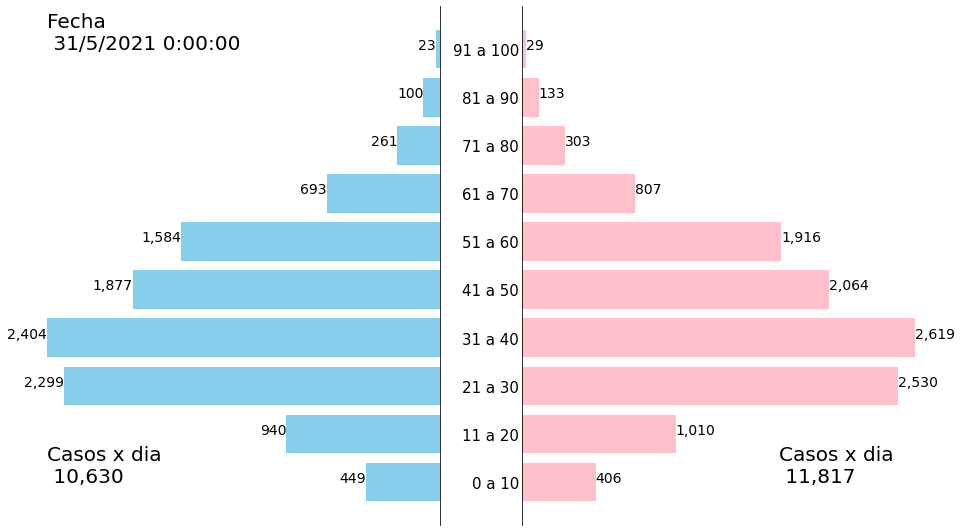

In [90]:
RacePiramide(lista_fechas[450])
# fig,ax= subplots(ncols=2,figsize=(14,9))
# mi_anim=animation.FuncAnimation(fig,RacePiramide,frames=lista_fechas[200:300],interval=50)
# rcParams['animation.embed_limit'] = 2**128
# HTML(mi_anim.to_html5_video())